#### Load of libraries and packages

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#### Data import

In [2]:
df = pd.read_csv("D:/ocular/full_df.csv")
df = df.drop_duplicates(subset = ['ID'])

#### Exploratory Data Analysis

In [3]:
# Crude estimation of findings ratio
findings = df.iloc[:, 7:15]
totals = findings.sum()
totals

N    1080
D    1105
G     206
C     208
A     163
H     103
M     171
O     905
dtype: int64

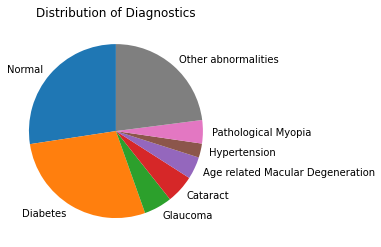

In [4]:
extended_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia', 'Other abnormalities']
plt.pie(totals, labels=extended_labels, startangle=90)

plt.title("Distribution of Diagnostics")

plt.show()

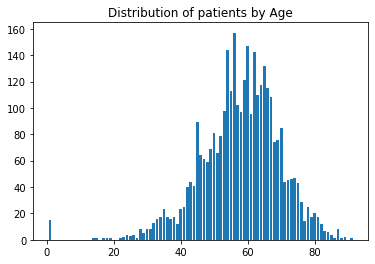

In [5]:
ages = df['Patient Age'].value_counts()
plt.bar(ages.index, ages)
plt.title("Distribution of patients by Age")
plt.show()

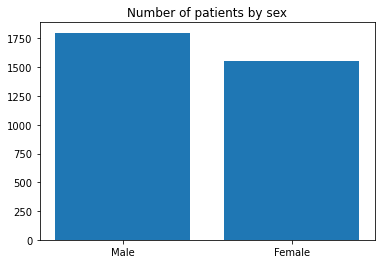

In [6]:
sex = df['Patient Sex'].value_counts()
plt.bar(sex.index, sex)
plt.title("Number of patients by sex")
plt.show()

#### IMAGE TAGGING

In [7]:
# import libraries

import shutil
import random
from sklearn.model_selection import train_test_split
import imageio


In [8]:
df = pd.read_csv("D:/ocular/full_df.csv")

In [9]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [10]:
df.tail(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


In [11]:
# confirm that each patient appears two times (one per eye)
df[df['Left-Fundus'] == '0_left.jpg']

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg


In [12]:
# check if there are the same amount of images for left and right eyes
print("Number of labelled images for left eye: " + str(len(df[df['filename'].str.contains('left')])))
print("Number of labelled images for right eye: " + str(len(df[df['filename'].str.contains('right')])))

Number of labelled images for left eye: 3198
Number of labelled images for right eye: 3194


#### IMAGE TAGGING - ORGANIZING THE IMAGES IN DIRECTORIES BY LABEL

In [15]:
# select from original dataframe just filenames and labels columns
df_file_target = df[['filename', 'target']]

size = len(df_file_target)

# all the images filepaths in the dataset read from the main directory and read from the dataframe
filenames = os.listdir("D:/ocular/preprocessed_images")
ls_df_files = df_file_target['filename'].to_list()

# check if there are images for all the labelled data in the dataframe by checking which rows are not in the image directory
# if this return 0 means that there are images for all the dataset rows
print(str(len([ls_df_files[i] for i in ls_df_files if i not in filenames])))

# print also the size of the dataset
print("\nTotal images labelled: " + str(size))

0

Total images labelled: 6392


In [16]:
df_distribution = df_file_target.groupby('target').count().sort_values('filename', ascending=False)
df_distribution = df_distribution.reset_index()
df_distribution['target'] = ['Normal (N)', 'Diabetes (D)', 'Other diseases/abnormalities (O)', 'Cataract (C)', 'Glaucoma (G)', 
                             'Age related Macular Degeneration (A)', 'Pathological Myopia (M)', 'Hypertension (H)']
df_distribution.rename(columns={'target':'Name of the disease', 'filename':'Number of images'}, inplace=True)

df_distribution['Percentage'] = round((df_distribution['Number of images'] / size) * 100, 2)

df_distribution

,Name of the disease,Number of images,Percentage
0,Normal (N),2873,44.95
1,Diabetes (D),1608,25.16
2,Other diseases/abnormalities (O),708,11.08
3,Cataract (C),293,4.58
4,Glaucoma (G),284,4.44
5,Age related Macular Degeneration (A),266,4.16
6,Pathological Myopia (M),232,3.63
7,Hypertension (H),128,2.00


In [17]:
# dictionary with category names and target vector
categories = {
    "N": "[1, 0, 0, 0, 0, 0, 0, 0]",
    "D": "[0, 1, 0, 0, 0, 0, 0, 0]",
    "G": "[0, 0, 1, 0, 0, 0, 0, 0]",
    "C": "[0, 0, 0, 1, 0, 0, 0, 0]",
    "A": "[0, 0, 0, 0, 1, 0, 0, 0]",
    "H": "[0, 0, 0, 0, 0, 1, 0, 0]",
    "M": "[0, 0, 0, 0, 0, 0, 1, 0]",
    "O": "[0, 0, 0, 0, 0, 0, 0, 1]",
}

# create main directory if not exists
if not os.path.exists('D:/ocular/Labeled Images'): os.mkdir('D:/ocular/Labeled Images') 

# create train and test directories under main directory
if not os.path.exists('D:/ocular/Labeled Images/Train/'): os.mkdir('D:/ocular/Labeled Images/Train/') 
if not os.path.exists('D:/ocular/Labeled Images/Test/'): os.mkdir('D:/ocular/Labeled Images/Test/')

# split the dataframe in train(90%) and test(10%), applying shuffle and mantaining the proportion of the classes
train_df, test_df = train_test_split(df_file_target, test_size=0.1, random_state=432, shuffle=True, stratify=df['target'])

# This function given a directory path and a dataframe (train or test) creates one directory per label and move the images inside 
def make_labels_directories(parent_path, df):
    # initialize list that will save sizes from each directory and from dataframe filter by label 
    ls_len_df = []
    ls_len_directory = []
    # iterate over the dictionary of categories
    for c in categories:
        # create directory for the category
        path = parent_path + c
        if not os.path.exists(path): os.mkdir(path) 
        df_aux = df[df['target'] == categories[c]]
        
        # move the file from the main directory
        path_src = "D:/ocular/preprocessed_images/"
        path_dst = path + '/'
        for file in df_aux['filename']:
            shutil.copyfile(path_src + file, path_dst + file)

        ls_len_df.append(len(df_aux))
        ls_len_directory.append(len(os.listdir(path)))
    
    # print both lists to check that the copy of the files was made propertly
    print("List of dataframe lenghts per category: " + str(ls_len_df))
    print("List of directories lenghts per category: " + str(ls_len_df))

In [18]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating train directory...")
make_labels_directories('D:/ocular/Labeled Images/Train/', train_df)

Creating train directory...
List of dataframe lenghts per category: [2585, 1447, 256, 264, 239, 115, 209, 637]
List of directories lenghts per category: [2585, 1447, 256, 264, 239, 115, 209, 637]


In [19]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating test directory...")
make_labels_directories('D:/ocular/Labeled Images/Test/', test_df)

Creating test directory...
List of dataframe lenghts per category: [288, 161, 28, 29, 27, 13, 23, 71]
List of directories lenghts per category: [288, 161, 28, 29, 27, 13, 23, 71]


#### PLOTTING SAMPLE IMAGES FROM EACH CATEGORY

In [20]:
# Function that plots 9 images randomly taken from the each category directory

path = 'D:/ocular/Labeled Images/Train/'
def sample_plotting(cat_name, cat_label):
    images_filenames = os.listdir(path+cat_label)
    # randomly select a sample of 9 images from the directory
    sample = random.sample(images_filenames, 9)
    cat_path = path + cat_label + '/'
    print("Sample of " + cat_name + " (" + str(cat_label) + ") images:")
    f, ax = plt.subplots(3,3, figsize=(8,8))
    for i in range(len(sample)):
        path_image = cat_path + sample[i]
        img = imageio.imread(path_image)
        ax[i//3, i%3].imshow(img)
        ax[i//3, i%3].axis('off')
    plt.show()

Sample of Normal (N) images:


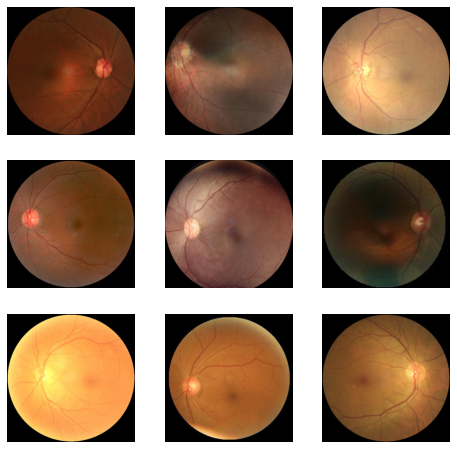

In [21]:
# sample plots for category: Normal (N)
sample_plotting("Normal", "N")

Sample of Diabetes (D) images:


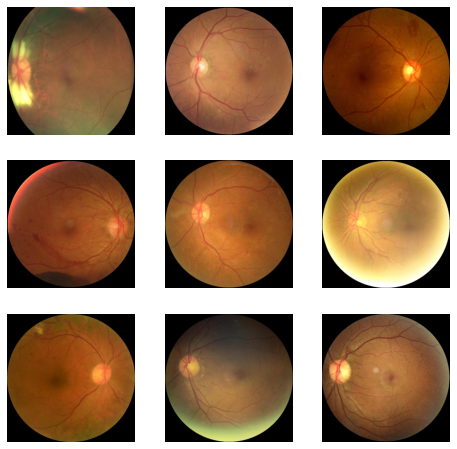

In [22]:
# sample plots for category: Diabetes (D)
sample_plotting("Diabetes", "D")

Sample of Other diseases/abnormalities (O) images:


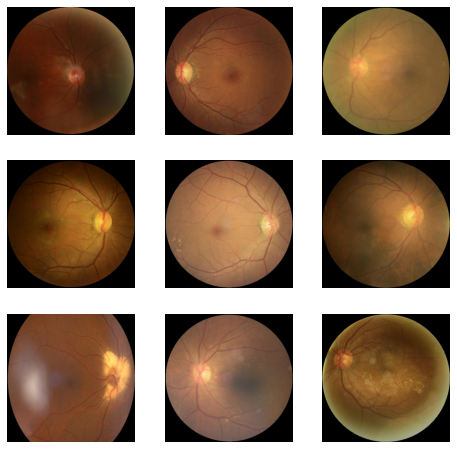

In [23]:
# sample plots for category: Other diseases/abnormalities (O)
sample_plotting("Other diseases/abnormalities", "O")

Sample of Cataract (C) images:


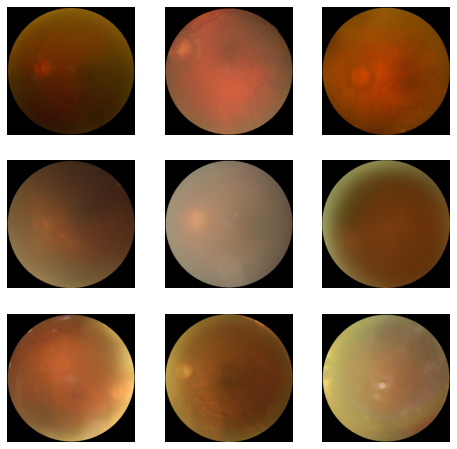

In [24]:
# sample plots for category: Cataract (C)
sample_plotting("Cataract", "C")

Sample of Glaucoma (G) images:


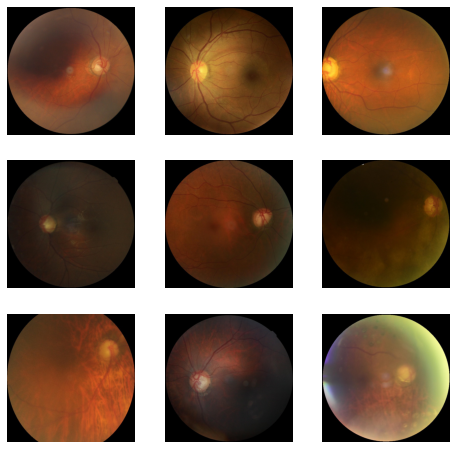

In [25]:
# sample plots for category: Glaucoma (G)
sample_plotting("Glaucoma", "G")

Sample of Age related Macular Degeneration (A) images:


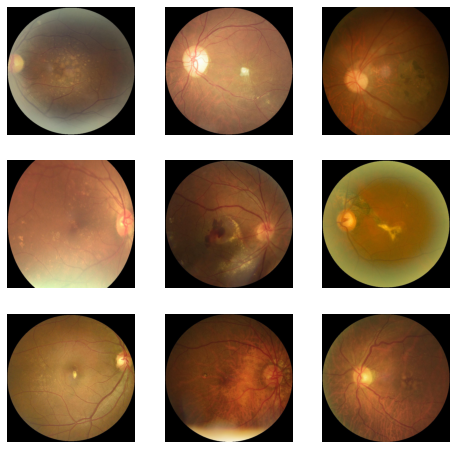

In [26]:
# sample plots for category: Age related Macular Degeneration (A)
sample_plotting("Age related Macular Degeneration", "A")

Sample of Pathological Myopia (M) images:


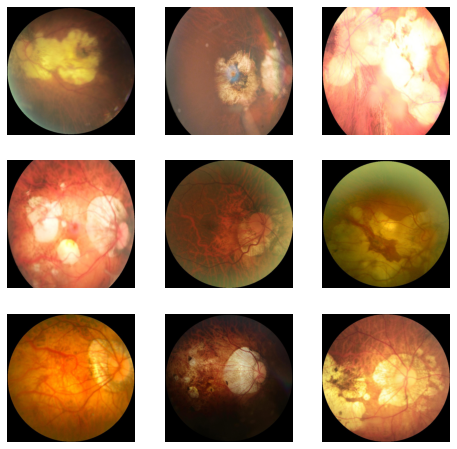

In [27]:
# sample plots for category: Pathological Myopia (M)
sample_plotting("Pathological Myopia", "M")

Sample of Hypertension (H) images:


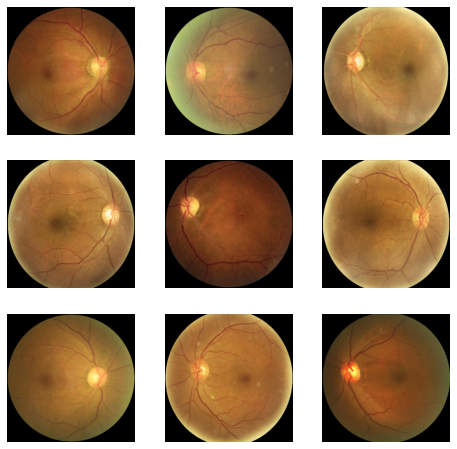

In [28]:
# sample plots for category: Hypertension (H)
sample_plotting("Hypertension", "H")

#### IMAGE FLIPPING 

In [29]:
# import libraries

import shutil
import cv2

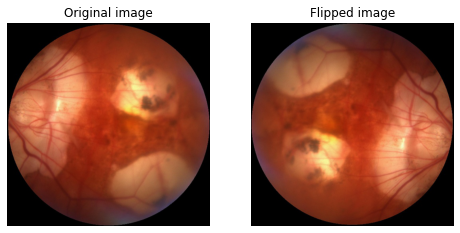

In [32]:
sample_image = 'D:/ocular/Labeled Images/Train/M/1349_left.jpg'

# read image
im = imageio.imread(sample_image)

# flip image
flipped_image = cv2.flip(im, -1)

# plot image
f, ax = plt.subplots(1,2, figsize=(8,8))  

ax[0].title.set_text("Original image")
ax[0].imshow(im)
ax[0].axis('off')

ax[1].title.set_text("Flipped image")
ax[1].imshow(flipped_image)
ax[1].axis('off')

plt.show()

In [33]:
'''
This function takes the actual dataset path and the new dataset path (train or test) and loop over the images,
applying the flip conversion to the right ones and moving the files to a new directory 
(right images are flipped and copied to the new directory and left images are just copied)
'''

def flip_images_to_directory(dataset_path, new_dataset_path):
    classes_path = [dataset_path + c for c in os.listdir(dataset_path)]
    for class_directory in classes_path:
        new_class_path = new_dataset_path + class_directory.split('/')[-1]
        if not os.path.exists(new_class_path): os.mkdir(new_class_path) 
        images_path = [class_directory+'/'+im for im in os.listdir(class_directory)]
        for im in images_path:
            aux = im.split('/')
            new_path = new_dataset_path + aux[-2] + '/' + aux[-1]
            if im[-9:] == 'right.jpg':
                image = cv2.imread(im)
                flipped_image = cv2.flip(image, -1)
                cv2.imwrite(new_path, flipped_image)
            else:
                shutil.copyfile(im, new_path)

In [34]:

# actual dataset paths
train_path = "D:/ocular/Labeled Images/Train/"
test_path = "D:/ocular/Labeled Images/Test/"

# new dataset paths
new_train_path = "D:/ocular/Labeled Images/Flipped/train/"
new_test_path = "D:/ocular/Labeled Images/Flipped/test/"

# create new main directory if not exists
if not os.path.exists('D:/ocular/Labeled Images/Flipped'): os.mkdir('D:/ocular/Labeled Images/Flipped') 

# create new train and test directories under main directory
if not os.path.exists(new_train_path): os.mkdir(new_train_path) 
if not os.path.exists(new_test_path): os.mkdir(new_test_path)


# Call the function to apply the conversion and copy the files to new directories
# for the train set
print("Applying flipping process to the train set and moving files to the new directory...")
flip_images_to_directory(train_path, new_train_path)
print('Done!')

# for the test set
print("Applying flipping process to the test set and moving files to the new directory...")
flip_images_to_directory(test_path, new_test_path)
print('Done!')

print('Flipping process finished successfully!')

Applying flipping process to the train set and moving files to the new directory...
Done!
Applying flipping process to the test set and moving files to the new directory...
Done!
Flipping process finished successfully!


#### Grayscaling Image Level

In [38]:
input_path=r'D:/ocular/preprocessed_images/'
output_path=r'D:/MyDrive/ocular/Labeled Images/Clahed/'


image_size=225

def reversal(input_path,output_path):
    input_files = os.listdir(input_path)
    for file in input_files:
        file_path=os.path.join(input_path,file)
        save_path=os.path.join(output_path,file)
        img=cv2.imread(file_path)
        img = cv2.resize(img,(image_size,image_size))
        reversal=255-img
        cv2.imwrite(save_path,reversal)

        del img
        del reversal

def CLAHE(input_path,output_path):
    input_files = os.listdir(input_path)
    for file in input_files:

        file_path = os.path.join(input_path, file)
        save_path = os.path.join(output_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img,(image_size,image_size))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
        clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(10, 10))
        clahed_img=clahe.apply(gray)
        cv2.imwrite(save_path, clahed_img)
        del img
        del gray
        del clahe

def histogram_equalization(input_path,output_path):
    input_files = os.listdir(input_path)
    for file in input_files:

        file_path = os.path.join(input_path, file)
        save_path = os.path.join(output_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img,(image_size,image_size))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        equ=cv2.equalizeHist(gray)
        cv2.imwrite(save_path, equ)
        del img
        del gray
        del que

if __name__ == "__main__":
    CLAHE(input_path,output_path)

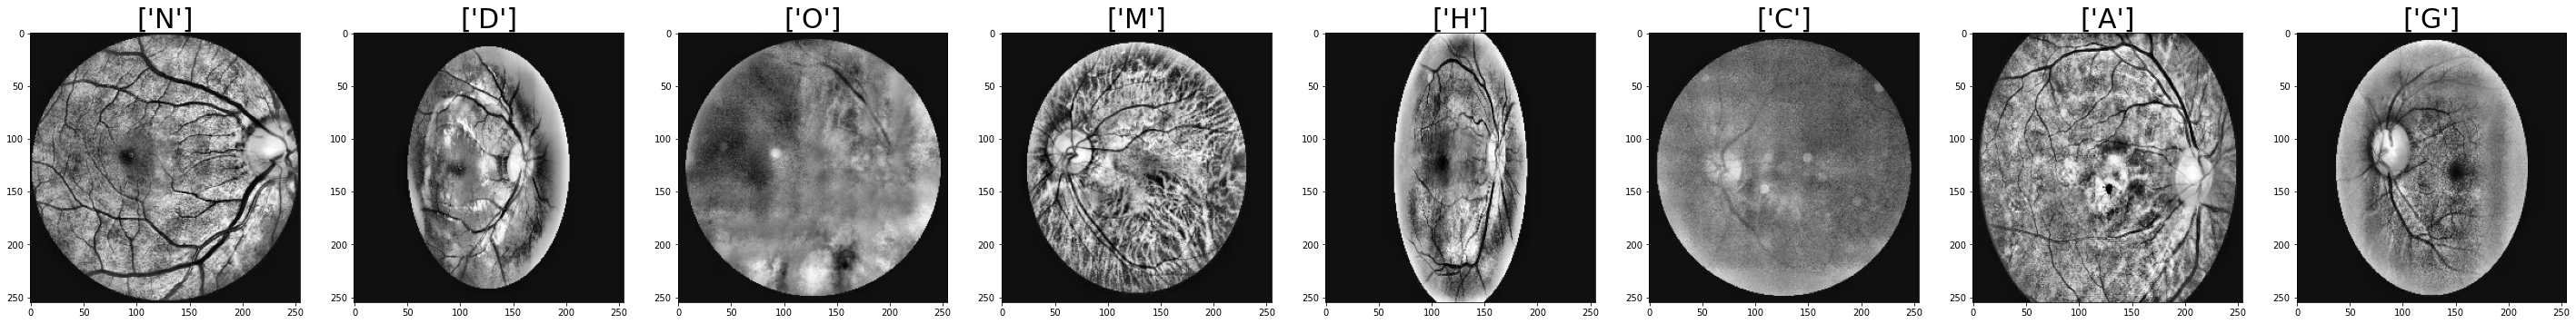

In [40]:
count = 1
f = plt.figure(figsize=(50,20))
for Class in df['labels'].unique():
    seg = df[df['labels']==Class]
    address = seg.sample().iloc[0]['filename']
    dataset_dir = "D:/ocular/Labeled Images/Clahed/"
    img = cv2.imread(dataset_dir+ address)
    #print(img)
    ax = f.add_subplot(3, 8,count)
    ax = plt.imshow(img)
    ax = plt.title(Class,fontsize= 30)
    count = count + 1
plt.show()